# 案例：股票收益率预测——ARIMA


接上一节内容，本节使用时间序列模型（ARIMA）来回归股票收益率序列。

In [17]:
import pandas as pd
X_train = pd.read_csv('datasets/X_train.csv', index_col=0)
X_test = pd.read_csv('datasets/X_test.csv', index_col=0, date_format='%Y%m%d')
y_train = pd.read_csv('datasets/y_train.csv', index_col=0)
y_test = pd.read_csv('datasets/y_test.csv', index_col=0)

In [19]:
X_train.index = pd.to_datetime(X_train.index)
X_test.index = pd.to_datetime(X_test.index)
y_train.index = pd.to_datetime(y_train.index)
y_test.index = pd.to_datetime(y_test.index)

## 6. 时间序列分析模型——ARIMA

### 6.1 时间序列分解

下一步，我们深入进行时间序列分析，观察将预测变量的时间序列分解为趋势和季节性组成部分：

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Songti SC'  # 设置字体为宋体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示异常
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg') 

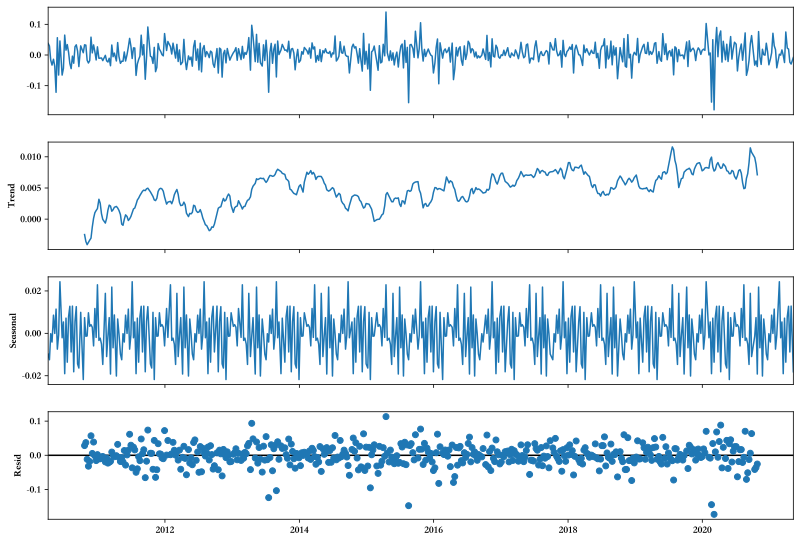

In [21]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(y_train,period=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(12)

### 6.2 ARIMA模型

对于基于时间序列的模型，我们不需要将 MSFT 的滞后变量作为自变量。因此，作为第一步，我们在这些模型中剔除了 MSFT 之前的收益。在这些模型中，我们使用所有其他变量作为外生变量。

In [29]:
X_train_ARIMA=X_train.loc[:, ['GOOGL', 'IBM', 'USDJPY', 'SPX', 'DJI', 'VIX']]
X_test_ARIMA=X_test.loc[:, ['GOOGL', 'IBM', 'USDJPY', 'SPX', 'DJI', 'VIX']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = 676 # X的总样本数

In [30]:
from statsmodels.tsa.arima.model import ARIMA
modelARIMA=ARIMA(endog=y_train.values,exog=X_train_ARIMA.values,order=[10,0,5])
model_fit = modelARIMA.fit()

/Users/xhc/miniconda3/envs/d2l/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/xhc/miniconda3/envs/d2l/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/xhc/miniconda3/envs/d2l/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
from sklearn.metrics import mean_squared_error
error_Training_ARIMA = mean_squared_error(y_train, model_fit.fittedvalues)
error_Training_ARIMA

0.0011396986476612594

In [32]:
predicted = model_fit.predict(start = tr_len -1 ,end = to_len-1, exog = X_test_ARIMA.values)[1:]
error_Test_ARIMA = mean_squared_error(y_test,predicted)
error_Test_ARIMA

0.0012456019039559438

这个 ARIMA 模型的误差是合理的。
